# EDA on Netflix

Our analysis focused on examining key aspects of the dataset to gain insights into Netflix's content. Firstly, we sought to determine whether Netflix had a higher number of movies or TV series. 
Additionally, we investigated the presence of older content in the dataset, specifically identifying when it was added and the nature of that content.
Furthermore, we aimed to identify the year with the highest and lowest content releases, allowing us to understand the trends and patterns of Netflix's content distribution over time. Additionally, we explored the release patterns within each month to ascertain which day of the month Netflix typically releases the most content.



In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
data_import = pd.read_csv("netflix_titles.csv")


# High Level EDA

In [4]:
data_import.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Lets look at the data types

In [7]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Convert the date to date format from object

In [6]:
data_import['date_added'] = pd.to_datetime(data_import['date_added'].str.strip(),format='%B %d, %Y')

Get summary statistic
We have a movie from 

In [9]:
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Dropping Cast column

In [85]:
data_import.drop('cast',axis=1,inplace=True)

In [86]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_month', 'date_added_day', 'binary_type'],
      dtype='object')

# Looking at Null Values 

In [87]:
data_import.isnull().sum()

show_id             0
type                0
title               0
director            0
country             0
date_added          0
release_year        0
rating              0
duration            3
listed_in           0
description         0
date_added_month    0
date_added_day      0
binary_type         0
dtype: int64

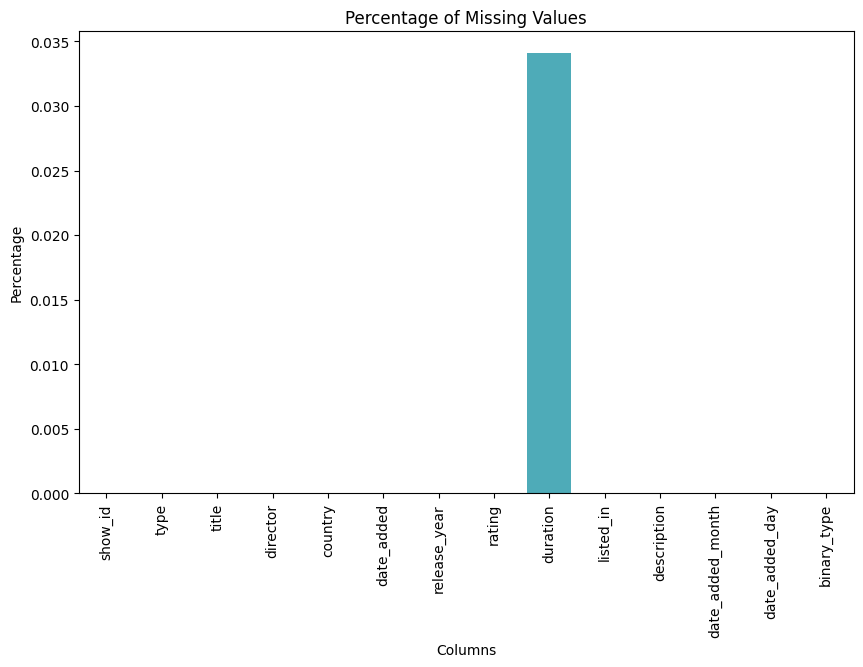

In [88]:
missing_value_per = pd.DataFrame((data_import.isnull().sum()/len(data_import))*100)

plt.figure(figsize=(10,6))
sns.barplot(data=missing_value_per, x=missing_value_per.index, y=missing_value_per[0])
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


We can see that the director column has the most missing values followed by the cast and country column.
For a better analysis we're going to make use of a strategy called value Imputation.

In [89]:
most_frequent_country = data_import['country'].mode()[0]
data_import['country'].fillna(most_frequent_country, inplace=True)

most_frequent_country = data_import['director'].mode()[0]
data_import['director'].fillna(most_frequent_country, inplace=True)

most_frequent_country = data_import['date_added'].mode()[0]
data_import['date_added'].fillna(most_frequent_country, inplace=True)


most_frequent_country = data_import['rating'].mode()[0]
data_import['rating'].fillna(most_frequent_country, inplace=True)




# Which year was there the most movies and tv shows released?

In [91]:
fig = px.histogram(data_import,
            x='release_year',
                   color='type',
                  title='Year the most content was released')
fig.update_layout(bargap=0.1,
                 plot_bgcolor='mistyrose' 
)
fig.show()


# oldest content on nexflix

In [92]:
#Which movie was released in 1925
data_import[data_import['release_year']==1925]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,binary_type
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Rajiv Chilaka,United States,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,12,30,0


In [93]:
fig = px.histogram(data_import,
            x='date_added',
            title='When content was added')
fig.update_layout(bargap=0.1)
fig.show()

Based on the data, which month is there content released most?

In [94]:
#extract month from the date
data_import['date_added_month'] = data_import['date_added'].dt.month.fillna(0)
data_import['date_added_day'] = data_import['date_added'].dt.day.fillna(0)

In [95]:
fig = px.histogram(data_import, x='date_added_day',
                  title='Distribution of Content by Day Added',
                  color='type')
                   
fig.update_layout(xaxis_title='Day Added',
                    yaxis_title='Count',
                    legend=dict(x=0.8, y=0.9),
                    font=dict(family='Arial', size=12),
                    plot_bgcolor='rgba(0,0,0,0)'

)



# String Column Analysis

In [96]:
#We only have tv shows movie in this data set
data_import['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [97]:
px.histogram(data_import, x='date_added_day',color='type')

In [98]:
px.histogram(data_import,
            x='date_added',color='type')

Which countries are producing movies or the most movies.
Multiple countries worked on one country. What we'll do is in our visualization is ensure that each contry gets recognized for each movie,by taking them out of an array and putting them in a straight line by melting the data(function)

In [99]:
data_import['country'].str.split(',',expand=True, )

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,United States,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,United States,None,None,None,None,None,None,None,None,None,None,None
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [100]:
country_count = data_import.copy()
country_count = pd.concat([country_count, data_import['country'].str.split(',', expand=True)], axis=1)
country_count = country_count.melt(id_vars=['type', 'title'], value_vars=range(8), value_name='country')
country_count = country_count.dropna(subset=['country'])
country_count['country'] = country_count['country'].str.strip()
country_count = country_count[['type', 'title', 'country']].drop_duplicates(subset=['type', 'title'])

# Now let's assign a single country for each movie or series
country_count = country_count.groupby(['type', 'title'], as_index=False)['country'].first()
country_count

C:\Users\Admin\AppData\Local\Temp\ipykernel_18700\2560523496.py:3: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



,type,title,country
0,Movie,#Alive,South Korea
1,Movie,#AnneFrank - Parallel Stories,Italy
2,Movie,#FriendButMarried,Indonesia
3,Movie,#FriendButMarried 2,Indonesia
4,Movie,#Roxy,Canada
...,...,...,...
8802,TV Show,แผนร้ายนายเจ้าเล่ห์,United States
8803,TV Show,​SAINT SEIYA: Knights of the Zodiac,Japan
8804,TV Show,忍者ハットリくん,Japan
8805,TV Show,海的儿子,United States


Create a new dataframe as country count

In [101]:
px.histogram(country_count,'country',color='type')

In [103]:
# Calcu;lating the number of movies by a country
data_import['movies_count'] = data_import[data_import'']

SyntaxError: invalid syntax (4184216720.py, line 2)

In [ ]:
data_import

Is there more movies on Netflix or is there more series

In [ ]:
# Convert the type column into binary format
data_import['binary_type'] = data_import['type'].map({'Movie':1,'TV Show':0})
#We'll count the occurancees of movies and tv shows
count= data_import['binary_type'].value_counts()

sns.barplot(x=count.index, y=count.values)

plt.title('TV vs Movies')
plt.xlabel('Type')
plt.ylabel('Count')

There's more movies than tv show on Netflix

In [ ]:
pip install openpyxl --quiet

In [ ]:
data_import.to_excel('netflix_cleandata.xlsx', index=False)

In [ ]:
data_import